In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
file_path = './Datasets/DEMAND_DATA_SET_TEXAS.xlsx'
df = pd.read_excel(file_path)
df.head()

,Hour_End,COAST,EAST,FAR_WEST,NORTH,NORTH_C,SOUTHERN,SOUTH_C,WEST,season,...,Relative Humidity_SOUTH_C,Pressure_SOUTH_C,Wind Speed_SOUTH_C,Precipitable Water_SOUTH_C,Global Horizontal UV Irradiance (280-400nm)_SOUTH_C,Temperature_WEST,Relative Humidity_WEST,Pressure_WEST,Wind Speed_WEST,Precipitable Water_WEST
0,2009-01-01,175519.808224,26021.711251,27535.366659,17877.628770,230494.391858,46225.353768,109199.100739,20266.189296,3,...,43.28,952.25,3.72,0.65,8.36,7.43,47.15,939.00,3.77,0.61
1,2009-01-02,189629.545520,23552.501729,27269.110886,16670.843917,220268.870054,47260.666795,112714.269292,19884.627031,3,...,45.05,948.29,3.24,0.62,8.41,8.71,54.95,935.25,2.47,0.73
2,2009-01-03,191088.386304,23241.144180,26089.209623,15630.566651,211639.366540,50214.543906,110868.891577,18641.760463,3,...,44.91,946.13,3.86,0.89,8.32,11.45,44.89,932.79,3.60,0.64
3,2009-01-04,180221.173004,24210.469142,28855.279561,19514.066371,252293.903291,47977.462095,115478.773445,22657.413344,3,...,47.43,959.92,5.19,0.86,6.48,-0.17,46.15,948.56,4.99,0.83
4,2009-01-05,218879.805999,34147.205179,32089.849089,22909.295709,338502.536230,55588.637491,154291.272978,26876.941743,3,...,52.12,956.00,3.44,1.75,3.50,-0.22,48.40,942.79,2.80,1.10


In [3]:
data = df.iloc[:, 14:]
data.head()

,Temperature_COAST,Relative Humidity_COAST,Pressure_COAST,Wind Speed_COAST,Density_COAST,Precipitable Water_COAST,Global Horizontal UV Irradiance (280-400nm)_COAST,Temperature_EAST,Relative Humidity_EAST,Pressure_EAST,...,Relative Humidity_SOUTH_C,Pressure_SOUTH_C,Wind Speed_SOUTH_C,Precipitable Water_SOUTH_C,Global Horizontal UV Irradiance (280-400nm)_SOUTH_C,Temperature_WEST,Relative Humidity_WEST,Pressure_WEST,Wind Speed_WEST,Precipitable Water_WEST
0,12.75,83.03,1015.04,1.83,2.339398,2.32,4.96,6.40,79.55,997.83,...,43.28,952.25,3.72,0.65,8.36,7.43,47.15,939.00,3.77,0.61
1,18.57,90.13,1010.04,2.35,2.398862,2.57,4.90,14.57,89.63,991.88,...,45.05,948.29,3.24,0.62,8.41,8.71,54.95,935.25,2.47,0.73
2,20.64,87.43,1007.71,3.27,2.421479,2.95,8.16,18.49,89.57,989.38,...,44.91,946.13,3.86,0.89,8.32,11.45,44.89,932.79,3.60,0.64
3,17.47,84.13,1014.00,2.26,2.380479,2.83,6.45,8.58,75.99,999.92,...,47.43,959.92,5.19,0.86,6.48,-0.17,46.15,948.56,4.99,0.83
4,8.15,78.61,1015.21,2.60,2.301353,3.58,1.67,3.82,89.01,999.33,...,52.12,956.00,3.44,1.75,3.50,-0.22,48.40,942.79,2.80,1.10


In [4]:
train = data.iloc[:-365]  # Use the first 9 years for training
test = data.iloc[-365:]   # Use the last year for testing
train.head()

,Temperature_COAST,Relative Humidity_COAST,Pressure_COAST,Wind Speed_COAST,Density_COAST,Precipitable Water_COAST,Global Horizontal UV Irradiance (280-400nm)_COAST,Temperature_EAST,Relative Humidity_EAST,Pressure_EAST,...,Relative Humidity_SOUTH_C,Pressure_SOUTH_C,Wind Speed_SOUTH_C,Precipitable Water_SOUTH_C,Global Horizontal UV Irradiance (280-400nm)_SOUTH_C,Temperature_WEST,Relative Humidity_WEST,Pressure_WEST,Wind Speed_WEST,Precipitable Water_WEST
0,12.75,83.03,1015.04,1.83,2.339398,2.32,4.96,6.40,79.55,997.83,...,43.28,952.25,3.72,0.65,8.36,7.43,47.15,939.00,3.77,0.61
1,18.57,90.13,1010.04,2.35,2.398862,2.57,4.90,14.57,89.63,991.88,...,45.05,948.29,3.24,0.62,8.41,8.71,54.95,935.25,2.47,0.73
2,20.64,87.43,1007.71,3.27,2.421479,2.95,8.16,18.49,89.57,989.38,...,44.91,946.13,3.86,0.89,8.32,11.45,44.89,932.79,3.60,0.64
3,17.47,84.13,1014.00,2.26,2.380479,2.83,6.45,8.58,75.99,999.92,...,47.43,959.92,5.19,0.86,6.48,-0.17,46.15,948.56,4.99,0.83
4,8.15,78.61,1015.21,2.60,2.301353,3.58,1.67,3.82,89.01,999.33,...,52.12,956.00,3.44,1.75,3.50,-0.22,48.40,942.79,2.80,1.10


In [5]:
test.head()

,Temperature_COAST,Relative Humidity_COAST,Pressure_COAST,Wind Speed_COAST,Density_COAST,Precipitable Water_COAST,Global Horizontal UV Irradiance (280-400nm)_COAST,Temperature_EAST,Relative Humidity_EAST,Pressure_EAST,...,Relative Humidity_SOUTH_C,Pressure_SOUTH_C,Wind Speed_SOUTH_C,Precipitable Water_SOUTH_C,Global Horizontal UV Irradiance (280-400nm)_SOUTH_C,Temperature_WEST,Relative Humidity_WEST,Pressure_WEST,Wind Speed_WEST,Precipitable Water_WEST
4748,23.33,85.85,1003.38,3.62,2.454207,3.02,6.35,16.86,84.05,988.46,...,61.79,947.38,4.91,1.53,6.50,5.88,72.16,935.56,5.05,1.43
4749,3.63,56.91,1021.71,5.58,2.249949,0.98,9.29,-2.37,58.19,1007.50,...,40.88,965.63,3.81,0.38,8.55,-1.84,42.52,952.56,3.32,0.38
4750,4.94,54.92,1027.88,1.37,2.247034,0.36,9.70,1.53,56.81,1011.46,...,36.30,964.50,2.80,0.33,8.60,2.75,39.38,950.75,2.64,0.37
4751,11.22,66.75,1018.71,1.83,2.318489,1.04,9.22,5.91,63.91,1001.13,...,32.90,954.17,4.20,0.40,8.36,7.19,37.00,940.56,4.30,0.42
4752,16.22,85.85,1010.50,1.92,2.378445,1.80,9.09,10.48,83.08,994.75,...,43.14,952.79,2.94,0.75,8.27,5.10,45.07,941.25,3.29,0.74


In [8]:
# Normalize the data
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train)
x_tr = np.arange(train_scaled.shape[0]).reshape(-1,1)
#x_tr = scaler.fit_transform(x_tr)

test_scaled = scaler.transform(test)
x_te = np.arange(test_scaled.shape[0]).reshape(-1,1)
#x_te = scaler.fit_transform(x_te)
print(x_tr.shape, train_scaled.shape, x_te.shape, test_scaled.shape)

(4748, 1) (4748, 48) (365, 1) (365, 48)


In [9]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:(i + time_steps), :])
        ys.append(y[i + time_steps, :])
    return np.array(Xs), np.array(ys)

In [10]:
time_steps = 10 
X_train, y_train = create_dataset(x_tr, train_scaled, time_steps)
X_test, y_test = create_dataset(x_te, test_scaled, time_steps)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(4738, 10, 1) (4738, 48) (355, 10, 1) (355, 48)


In [11]:
model = Sequential()
model.add(LSTM(units=100, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(train_scaled.shape[1]))
model.compile(optimizer='adam', loss='mse')

In [12]:
data_collection = []
for x in range(1):
    model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)
    predictions_scaled = model.predict(X_test)
    predictions = scaler.inverse_transform(predictions_scaled)
    y_test_orig = scaler.inverse_transform(y_test)
    rmse = np.sqrt(mean_squared_error(y_test_orig, predictions, multioutput='raw_values'))
    print("Root Mean Squared Error (RMSE) for each feature:")
    for i, feature in enumerate(data.columns):
        print(f"{feature}: {rmse[i]}")
        data_collection.append(rmse[i])

Epoch 1/100
149/149 [==============================] - 2s 4ms/step - loss: 0.1793
Epoch 2/100
149/149 [==============================] - 1s 4ms/step - loss: 0.0357
Epoch 3/100
149/149 [==============================] - 1s 4ms/step - loss: 0.0354
Epoch 4/100
149/149 [==============================] - 1s 4ms/step - loss: 0.0357
Epoch 5/100
149/149 [==============================] - 1s 4ms/step - loss: 0.0363
Epoch 6/100
149/149 [==============================] - 1s 4ms/step - loss: 0.0352
Epoch 7/100
149/149 [==============================] - 1s 4ms/step - loss: 0.0353
Epoch 8/100
149/149 [==============================] - 1s 4ms/step - loss: 0.0353
Epoch 9/100
149/149 [==============================] - 1s 3ms/step - loss: 0.0351
Epoch 10/100
149/149 [==============================] - 1s 3ms/step - loss: 0.0350
Epoch 11/100
149/149 [==============================] - 0s 3ms/step - loss: 0.0349
Epoch 12/100
149/149 [==============================] - 0s 3ms/step - loss: 0.0346
Epoch 13/100


149/149 [==============================] - 1s 5ms/step - loss: 0.0015
Epoch 88/100
149/149 [==============================] - 1s 4ms/step - loss: 0.0014
Epoch 89/100
149/149 [==============================] - 1s 4ms/step - loss: 0.0014
Epoch 90/100
149/149 [==============================] - 1s 4ms/step - loss: 0.0014
Epoch 91/100
149/149 [==============================] - 1s 4ms/step - loss: 0.0014
Epoch 92/100
149/149 [==============================] - 1s 4ms/step - loss: 0.0014
Epoch 93/100
149/149 [==============================] - 1s 4ms/step - loss: 0.0014
Epoch 94/100
149/149 [==============================] - 1s 4ms/step - loss: 0.0014
Epoch 95/100
149/149 [==============================] - 1s 5ms/step - loss: 0.0014
Epoch 96/100
149/149 [==============================] - 1s 4ms/step - loss: 0.0013
Epoch 97/100
149/149 [==============================] - 1s 4ms/step - loss: 0.0013
Epoch 98/100
149/149 [==============================] - 1s 4ms/step - loss: 0.0013
Epoch 99/100
149/

149/149 [==============================] - 1s 4ms/step - loss: 7.7281e-04
Epoch 80/100
149/149 [==============================] - 1s 4ms/step - loss: 7.7718e-04
Epoch 81/100
149/149 [==============================] - 1s 4ms/step - loss: 8.0827e-04
Epoch 82/100
149/149 [==============================] - 1s 4ms/step - loss: 7.4773e-04
Epoch 83/100
149/149 [==============================] - 1s 4ms/step - loss: 7.9716e-04
Epoch 84/100
149/149 [==============================] - 1s 4ms/step - loss: 9.0560e-04
Epoch 85/100
149/149 [==============================] - 1s 4ms/step - loss: 7.6199e-04
Epoch 86/100
149/149 [==============================] - 1s 5ms/step - loss: 7.9648e-04
Epoch 87/100
149/149 [==============================] - 1s 4ms/step - loss: 8.9395e-04
Epoch 88/100
149/149 [==============================] - 1s 4ms/step - loss: 8.1210e-04
Epoch 89/100
149/149 [==============================] - 1s 4ms/step - loss: 7.7359e-04
Epoch 90/100
149/149 [==============================] - 

149/149 [==============================] - 1s 4ms/step - loss: 5.4648e-04
Epoch 70/100
149/149 [==============================] - 1s 4ms/step - loss: 6.4169e-04
Epoch 71/100
149/149 [==============================] - 1s 4ms/step - loss: 5.6122e-04
Epoch 72/100
149/149 [==============================] - 1s 4ms/step - loss: 5.3244e-04
Epoch 73/100
149/149 [==============================] - 1s 4ms/step - loss: 5.2387e-04
Epoch 74/100
149/149 [==============================] - 1s 4ms/step - loss: 5.1611e-04
Epoch 75/100
149/149 [==============================] - 1s 4ms/step - loss: 6.2022e-04
Epoch 76/100
149/149 [==============================] - 1s 4ms/step - loss: 6.0080e-04
Epoch 77/100
149/149 [==============================] - 1s 4ms/step - loss: 5.8093e-04
Epoch 78/100
149/149 [==============================] - 1s 4ms/step - loss: 5.0442e-04
Epoch 79/100
149/149 [==============================] - 1s 4ms/step - loss: 4.7774e-04
Epoch 80/100
149/149 [==============================] - 

In [106]:
temp = data_collection
datadata = []
for x in range(5):
    datadata.append(temp[x*7])
mean = np.mean(datadata)
std = np.std(datadata)
print(mean, std)

3.5698181668647075 3.2855042716130822


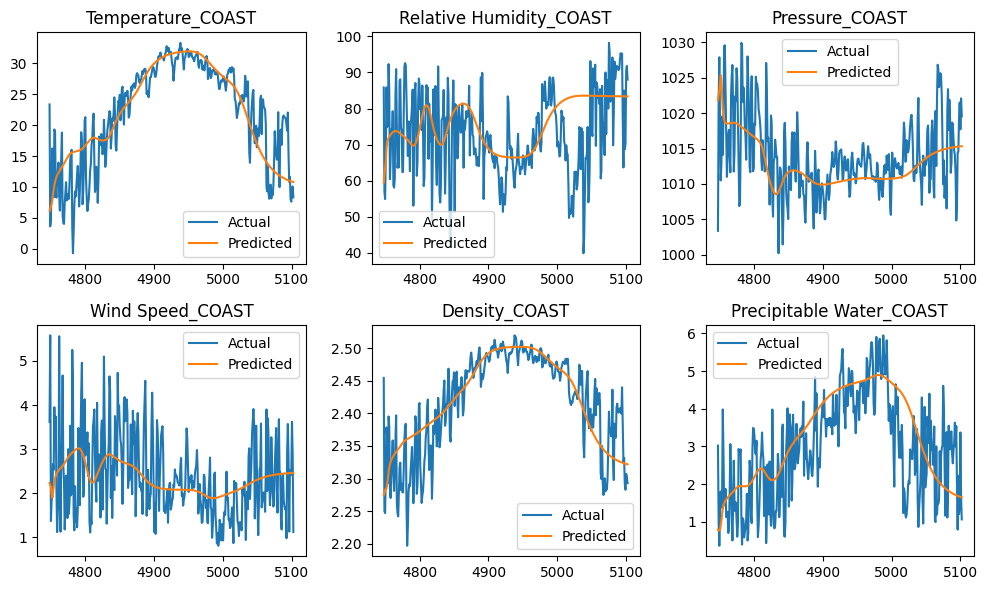

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for i, feature in enumerate(data.columns[:6]):
    plt.subplot(2, 3, i+1)
    plt.plot(test.index[:len(predictions)], test[feature][:len(predictions)], label='Actual')
    plt.plot(test.index[:len(predictions)], predictions[:,i], label='Predicted')
    plt.title(feature)
    plt.legend()

plt.tight_layout()
plt.show()